# Fourier Analysis and FFT
###  The purpose of this tutorial is to introduce the Fourier Analysis method. 

In [3]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 


## Oscillations 
### Oscillations are ubiquitous in the world.  If we look at any signal, one of the most commonly observed features, is an oscillation. 
### Colloquially, we might say a signal is oscillation if we observe an alternation between peaks and troughs.  (See for example EEG signals!)
### We need some math and physics to guide us here. 

### Sin and cosine functions defined over time,

### $ e = Asin(2 \pi f t)$
### $ e = Acos(2 \pi f t)$

### Really, these two functions can be written as one function, with an additional parameter.  

### $ e = Acos(2 \pi f t + \theta)$

*  #### t = vector of time points 
*  #### f = frequency 
*  #### A = amplitude 
*  #### $\theta$ = phase

In [4]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e


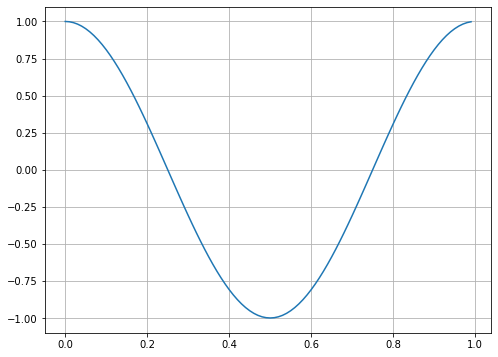

In [7]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
t = np.arange(0,1,ts) #this is the time time vector with 1 value of time for each sample.  
#using default values 
e = sinusoid(1,t) #A sinusoid with Amplitude 1 and Phase 0 by default. frequency is set to 1 Hz
plt.figure(figsize = (8,6))
plt.plot(t,e)
plt.grid()
plt.show()

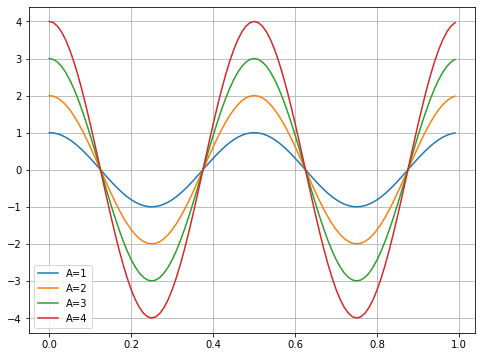

In [8]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
t = np.arange(0,1,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate amplitude(A) 
plt.figure(figsize = (8,6))
es = dict()
for j in range(1,5,1):
    es[j] = sinusoid(2,t,A=j)
    plt.plot(t,es[j])
plt.legend(('A=1','A=2','A=3','A=4'))
plt.grid()
plt.show()

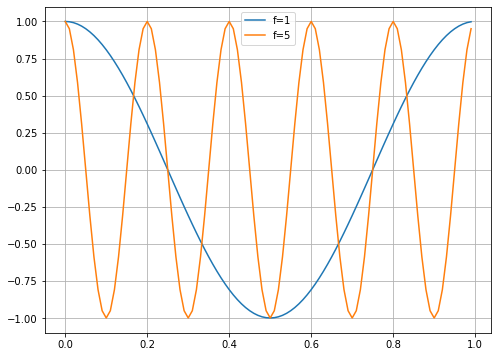

In [9]:
testf = 5 #this is the frequency I want to plot.  
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
t = np.arange(0,1,ts) #this is the time time vector with 1 value of time for each sample.  
plt.figure(figsize = (8,6))
#manipulate frequency 
es = dict()
es[1] = sinusoid(1,t)
plt.plot(t,es[1])
es[2] = sinusoid(testf,t)
plt.plot(t,es[2])
plt.legend(('f=1','f='+str(testf)))
plt.grid(True)
plt.show()

#### The frequency of a sinusoid (f) is the inverse of the period $t_p$ .   A sinusoid of frequency f completes one complete cycle in a period $t_p = \frac{1}{f}$. 

#### e.g., When the frequency is 5 Hz, the period is 1/5 = 0.2 sec, or 200 ms.

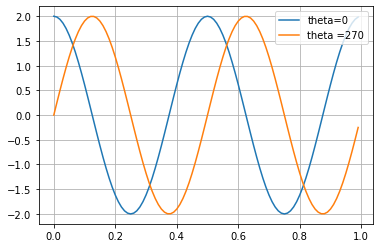

In [12]:
testp = 270#phase to be tested.   
tsamplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
t = np.arange(0,1,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
es[1] = sinusoid(2,t,A=2,theta = 0)
plt.plot(t,es[1])
es[2] = sinusoid(2,t,A=2,theta = testp)
plt.plot(t,es[2])
plt.legend(('theta=0','theta ='+str(testp)))
plt.grid(True)
plt.show()

### Here we see that cosine and sine functions are related by a difference in phase. 

### **Cosine and sine have a phase difference of 90 degrees**

#### What does that mean?  

#### Arbitrary phase differences

#### $cos(2 \pi f t + \theta) = cos(\theta)cos(2 \pi f t) - sin(\theta)sin(2 \pi f t)$


## Orthogonality and the Fourier Series

### Orthogonality

#### When we work with vectors ($\vec{x}$ and $\vec{y}$), the definition of perpendicular is that the dot product between the vectors is that the dot product is zero 

#### $ \vec{x} \cdot \vec{y} = 0 $

#### we use the concept of perpendicular to define a coordinate axis. For example, the x and y axis in a plane are perpendicular to each other. (We will come back to this important intuition)

#### When working with functions, the concept of perpendicular is called **orthogonal**.  $f(x)$ and $g(x)$ are orthogonal if and only

#### $ \int_{-\infty}^{\infty} f(x)g(x) dx = 0$

#### The limits of the integral above are the domain of the function.  


### Orthogonality of Sinusoidal Functions 

#### $ \int_{-\infty}^{\infty} cos(ux) cos(vx) dx = 0$ if $u \neq v$
#### $ \int_{-\infty}^{\infty} cos(ux) sin(ux) dx = 0$ 

#### The way to read the above statement is that a dot product of two sinusoid functions will equal zero unless the frequency of the sinusoid are identical.   

#### The best way to build our intuition is simulate.  

In [31]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 2 #This is the total length (in seconds) of the interval. 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
f = [4.5,5]
nsamp = np.size(t)
es[0] = sinusoid(f[0],t,theta = 90)
es[1] = sinusoid(f[1],t)
dp = np.sum(es[0]*es[1])/nsamp 
print(dp)

-2.486899575160351e-16


### Problem 1

Write a script to evaluate the dot product between two sinusoids as the frequency of one of the sinusoids is being changed.   

(a) Assume the sampling rate is 100 Hz and the interval is 1 sec one of the frequencies is 5 Hz and the other frequency changes from 3 to 7 in steps of 0.1. Make a plot of the difference in frequency (from -2 to 2 Hz verus the value of the dot product)     

(b) Run the code above for T = 1,2,5 and make labeled plots 

(c) Create a markdown box to write down what you think you see here.  

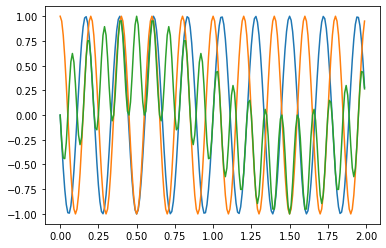

In [32]:
plt.plot(t,es[0])
plt.plot(t,es[1])
plt.plot(t,es[0]*es[1])
plt.show()

#### Fourier Series

#### Given x(t) of length N samples, 

#### $$ x(t) = A_0 + \sum_{n=0}^{N/2}{A_f[cos(2\pi{f_nt})] +B_f[sin(2\pi{f_nt})]}$$

#### $$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[cos(2\pi{f_nt}) -i\cdot sin(2\pi{f_nt})]}$$

#### $$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[exp^{(i 2\pi{f_nt})}]}$$

#### $$ f_n = \frac{n}{T}, n = -N/2, -N/2+1, ... N/2-1,N/2 $$

## DFT - Discrete Fourier Transfor,
#### The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the  sine waves that needed to sum to the time domain signal. 

#### The first expression above represents the time series x as a sum of sin and cosine functions up to the highest allowable frequency with N samples with is N/2. 

#### I then made use of *Euler's formula*, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$ to generate the 3rd expression. This is the critical expression of the Fourier series.  

#### $$ X_f = A_f + i\cdot B_f $$

#### Note that the $X_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi f_n t}$ of function $x(t)$. The amplitude and phase of the signal can be calculated as:

#### $$Amplitude = |X_f|= \sqrt{Re(X_f)^2 + Im(X_f)^2}$$

#### $$Phase = arctan(\frac{Im(X_k)}{Re(X_k)}$$

#### where $Im(X_k)$ and $Re(X_k)$ are the imaginary and real part of the complex number,




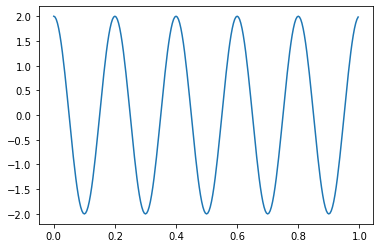

In [33]:
samplingrate = 250 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 # total length of samples
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
es[1] = sinusoid(5,t,A=2,theta = 0)
plt.plot(t,es[1])
plt.show()

In [34]:
xf = fft(es[1])
print(xf[0:20])

[-8.88178420e-16-0.00000000e+00j -5.75299283e-15-1.33487850e-17j
  3.48249143e-14+2.02143742e-14j -6.03246025e-14+5.50545321e-14j
 -6.15766443e-14-3.21814298e-14j  2.50000000e+02-5.77902319e-14j
  5.13331151e-15-1.42983770e-14j  7.36355930e-15-5.85144307e-15j
 -1.77092855e-14-8.21667290e-15j  6.46295705e-15+1.79490091e-14j
 -2.28182104e-14-3.14668793e-14j -2.46100737e-14-2.84650978e-14j
 -1.70463584e-14-5.07161088e-14j  5.94194033e-14-6.79237449e-14j
  3.75211657e-14+3.36204414e-14j  9.40913437e-15+1.56698524e-15j
  3.15794934e-14+1.29591761e-15j -5.06609923e-15-3.15396083e-15j
  2.86690276e-14-9.54903160e-15j  1.30160556e-14-7.53496814e-15j]


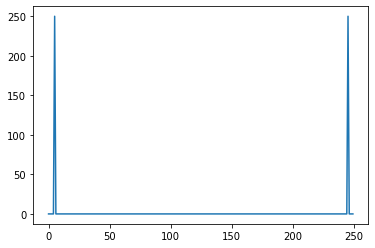

In [35]:
amplitude = np.abs(xf)
plt.plot(amplitude)

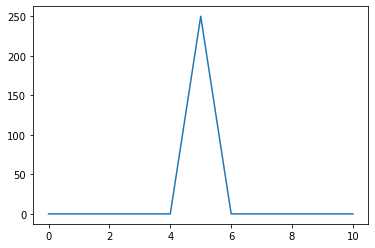

In [36]:
plt.plot(amplitude[0:11])

#### The amplitude returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. 

#### However, the FFT algorithm considers both positive and negative frequencies as in the definition of the Fourier Series above.  

#### If the input signal is a real-valued sequence as we described the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and multiply by 2 to get the amplitude corresponding to the time domain signal.


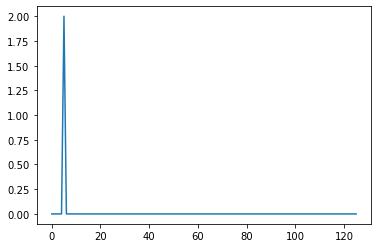

In [37]:
nsamp = np.size(t)
nf = np.floor(nsamp/2)  # I am going to use floor here in case nsamp is odd
nf = int(nf) #make sure its an integer
f_n = np.arange(0,nf+1)/T #these are the frequencies we can estimate 
amplitude = 2*np.abs(xf)/nsamp #I need to divide by the number of samples
                             #multiply by 2 to account for negative frequencies.    

plt.plot(f_n[0:nf+1],amplitude[0:nf+1])
plt.show()

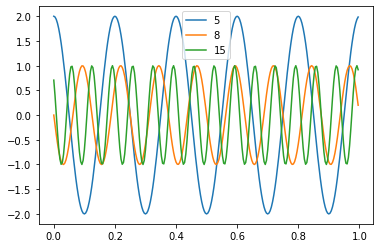

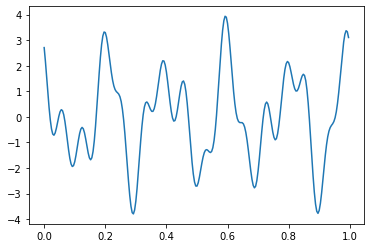

In [38]:
samplingrate = 250 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 # total length of samples
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
es[1] = sinusoid(5,t,A=2,theta = 0)
plt.plot(t,es[1])
es[2] = sinusoid(8,t,A=1,theta = 90)
plt.plot(t,es[2])
es[3] = sinusoid(15,t,A=1,theta = 45)
plt.plot(t,es[3])
plt.legend(['5','8','15'])
plt.show()
es[4] = es[1]+es[2]+es[3]
plt.figure()
plt.plot(t,es[4])
plt.show()

In [39]:
xf = dict()
for j in range(1,5,1):
    xf[j] = fft(es[j]) #I am going to store each fft output in a dictionary
nsamp = np.size(t)
nf = int(np.floor(nsamp/2))
f_n = np.arange(0,nf+1)/T

In [ ]:
print(xf[3][0:20])

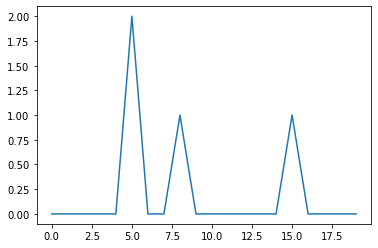

In [41]:
amplitude = 2*np.abs(xf[4])/nsamp
plt.plot(f_n[0:20],amplitude[0:20])

### Can we recover the phase?

In [44]:
p = np.angle(xf[4][15])
p = p*180/np.pi 
print(p)

44.99999999999965


### THE SINGLE MOST IMPRESSIVE THING ABOUT THIS 

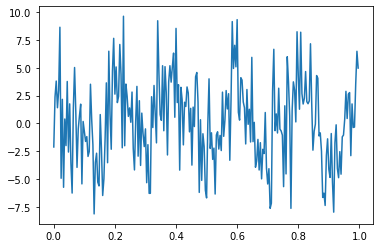

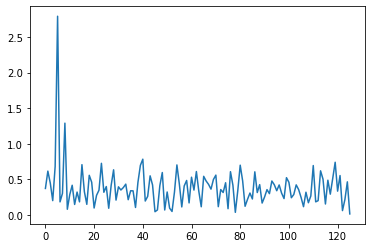

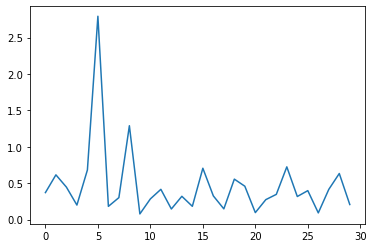

In [47]:
myseed = 1234
rng = np.random.default_rng(seed = myseed)
noise = rng.normal(0,3,nsamp) #random numbers with a mean of 0 
                              # and standatd deviation as 2nd parameter
signalwnoise = es[4]+noise
plt.plot(t,signalwnoise)
plt.show()
sn_fft = fft(signalwnoise)
amplitude = 2*np.abs(sn_fft)/nsamp

plt.plot(f_n,amplitude[0:nf+1])
plt.show()

plt.plot(f_n[0:30],amplitude[0:30])
plt.show()



## Spectral Analysis 

#### In many disciplines, including neuroscience, spectral analysis is often the starting point in analyzing time seres data. 

#### Spectral analysis is the analysis of the frequency content of the signals being observed.

#### Its foundational in analyzing human EEG but also Local Field Potentials (LFP) obtained from inserting electrodes into animal models

#### Like any other measure of data, the quality of the estimate can be improved by averaging over multiple observations.   

dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


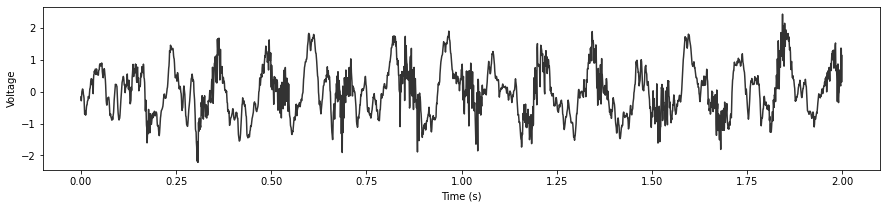

In [48]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps

lfp = data['lfp'][0,:]/1000 # this file contains two channels, we'll only work with the first one
lfp_short = lfp[:int(2*fs)] # make a variable that has only the first two seconds of the LFP
t_short = np.arange(0, len(lfp_short)*deltaT, deltaT) # create the corresponding time vector

plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

#### The plot above has the local field potential (LFP) recorded in the rat hippocampus. This dataset comes from an openly accessible neuroscience database. For more information on this particular dataset, see [here](https://crcns.org/data-sets/hc/hc-2/about-hc-2).

#### You will notice that the LFP signal has a very prominent rhythmic component, with peaks near, for example, 0.25, 0.37, and 0.5 seconds. Therefore, it has a **periodicity of about 0.125 seconds**, or a **frequency of 8Hz**. This is a very famous brain oscillation, called the theta oscillation which is central to memory functions.  There is also some faster oscillations observable in the plot.  

### Problem #2 

#### I want you to use the FFT algorithm to investigate the amplitudes of the frequency content of the signal, visualizing it, and averaging the amplitudes. 

#### (a) Use the FFT examples as a guide on how to compute and visualize the amplitude spectrum.  Compute the amplitude spectrum of the segment of the data plotted above (lfp_short).


#### (b) Visualize the amplitude on a linear and on a logarithmic scale. You can do this by take the log of the amplitude, but you can also do it by choosing a logarithmic scale when you call plot. 

#### (c) Make a loop to segment 10 consecutive epochs from the LFP file, and compute the amplitude of each epoch and plot them all on the same graph. 

#### (d) Extend your loop to compute the average amplitude spectrum of a set of m epochs. Make a graph that shows the average amplitude spectrum of the first m = 20, m= 40, and m = 80 epochs.  

